# User Segmentation

This notebook aims at analyzing the content of a user database that lists purchases made by  50.000 customers. 

With this analysis I want to find out more about the users and find possible actions that can be derived from the analysis.

I also develop a model that allows to anticipate the purchases that will be made by a new customer, during the following year and this, from its first purchase.

# Python Important Modules

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import squarify


In [2]:
path = os.getcwd()+"\\data\\q5.csv"
path

'C:\\Users\\work\\OneDrive\\Documents\\Work\\Laura\\Github\\Decathlon-Assignment\\Q5-User-Segmentation\\data\\q5.csv'

# Loading our dataset & EDA

In [3]:
df = pd.read_csv(path)
df.head()

,person_id,birthmonth,age,age_group,ttl_txn_off,ttl_to_off,ttl_qty_off,avg_to_per_txn_off,avg_qty_per_txn_off,avg_to_per_qty_off,...,to_share_sup,to_share_surfing,to_share_swimming,to_share_table_tennis,to_share_tennis,to_share_trail_running,to_share_traithlon,to_share_trekking,to_share_volleyball,to_share_yoga
0,4100498836251,unknown,NaN,unknown,5,2985.0,27,597.00,5.40,110.56,...,0.0,1.64,4.93,0.00,8.34,0.0,0.97,0.00,0.0,1.64
1,410049988782,unknown,NaN,unknown,1,268.0,7,268.00,7.00,38.29,...,0.0,0.00,0.00,0.00,6.62,0.0,3.31,0.00,0.0,0.00
2,4100500282463,unknown,NaN,unknown,7,590.0,15,84.29,2.14,39.33,...,0.0,0.00,17.97,0.00,0.00,0.0,0.00,0.00,0.0,0.00
3,4100500327491,unknown,NaN,unknown,1,295.0,5,295.00,5.00,59.00,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,7.41,0.0,0.00
4,4100500456116,unknown,NaN,unknown,4,1289.0,19,322.25,4.75,67.84,...,0.0,31.47,20.05,13.44,0.00,0.0,0.00,0.00,0.0,0.00


In [4]:
#Print basic information about our dataset

print("Shape: {}\n".format(df.shape))
print("Info:")
print(df.info(),"\n")
print("Unique:\n{}\n".format(df.nunique()))     

# This returns True if no duplicates are dropped (ie duplicates do not exist)
print("No duplicates: ",format(len(df)==len(df.drop_duplicates())))
print("Duplicated person_ids:",df.person_id.duplicated().sum())

Shape: (50000, 75)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 75 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   person_id                  50000 non-null  int64  
 1   birthmonth                 50000 non-null  object 
 2   age                        7699 non-null   float64
 3   age_group                  50000 non-null  object 
 4   ttl_txn_off                50000 non-null  int64  
 5   ttl_to_off                 50000 non-null  float64
 6   ttl_qty_off                50000 non-null  int64  
 7   avg_to_per_txn_off         50000 non-null  float64
 8   avg_qty_per_txn_off        50000 non-null  float64
 9   avg_to_per_qty_off         50000 non-null  float64
 10  ttl_txn_on                 50000 non-null  int64  
 11  ttl_to_on                  50000 non-null  float64
 12  ttl_qty_on                 50000 non-null  int64  
 13  avg_to_per_txn_on   

In [5]:
#adding a column with actual turnover per category instead of just share
lsst=[]
lssst=[]
m = df.columns
for mm in m:
    if "to_share" in mm:
        lsst.append(mm)
        lssst.append(mm.replace("_share_","_")+"x")

In [6]:
for x,y in zip(lsst,lssst):
    df[y]=round(df[x]/100*df["ttl_to"],2)

In [7]:
cols=["birthmonth","age","age_group"]

for x in cols:
    print("-----"+x+"-----\n")
    if x =="age":
        s=0
        for i in df[x]:
            if isinstance(i, str):
                print(i)
                s+=0
        if s==0:
            print("only nan + numeric values\n")
    else:
        print(df[x].value_counts())
        print("\n")


-----birthmonth-----

unknown    42301
JAN          763
OCT          722
NOV          720
AUG          699
SEP          692
DEC          676
JUL          634
JUN          616
MAY          564
MAR          544
APR          541
FEB          528
Name: birthmonth, dtype: int64


-----age-----

only nan + numeric values

-----age_group-----

unknown    42301
35-44       2318
25-34       1965
45-54       1828
55-64        671
18-24        644
65+          187
0-5           76
15-17          6
14-Nov         2
10-Jun         2
Name: age_group, dtype: int64




In [8]:
df=df.replace('unknown', np.nan)
nu=df.isna().sum()
nu = nu[nu > 0]
print("Columns with null values:\n\n",nu,"\n\n",round(nu[0]/len(df)*100,0),"% of records are null")

Columns with null values:

 birthmonth    42301
age           42301
age_group     42301
dtype: int64 

 85.0 % of records are null


As we can see above, the user data has significant null (or unknown) values for birthmonth, age and age_group. To drop all these rows would drastically shrink the dataset. Also imputing the values is not an option since all age related columns are null, hence we will not use them for general analysis. We could use the 15% of users with age information as a subset later on to see if there is an interesting pattern. 

In [9]:
col=df.columns
exclude = ["birthmonth","age","age_group"]
cols = [x for x in col if x not in exclude]
df = df[cols]

In [10]:
pd.set_option("display.max_columns", None)
df.head()

,person_id,ttl_txn_off,ttl_to_off,ttl_qty_off,avg_to_per_txn_off,avg_qty_per_txn_off,avg_to_per_qty_off,ttl_txn_on,ttl_to_on,ttl_qty_on,avg_to_per_txn_on,avg_qty_per_txn_on,avg_to_per_qty_on,ttl_txn,ttl_to,ttl_qty,avg_to_per_txn,avg_qty_per_txn,avg_to_per_qty,to_share_online,to_share_offline,no_txn_ind,no_online_txn_ind,no_offline_txn_ind,to_share_men,to_share_women,to_share_kid,to_share_gender_gap,qty_share_men,qty_share_women,qty_share_kid,to_share_weekday,to_share_weekend,to_share_holiday,to_share_althletics,to_share_badminton,to_share_baseball,to_share_basketball,to_share_beach_tennis,to_share_beach_volleyball,to_share_boat_sailing,to_share_bodyboarding,to_share_bodybuilding,to_share_climbing,to_share_cross_training,to_share_dinghy_sailing,to_share_dragon_boat,to_share_fitness,to_share_football,to_share_freediving,to_share_golf,to_share_gymnastics,to_share_hiking,to_share_jogging,to_share_kayak,to_share_pilates,to_share_road_bike,to_share_road_running,to_share_rugby,to_share_scuba_diving,to_share_snorkelling,to_share_squash,to_share_sup,to_share_surfing,to_share_swimming,to_share_table_tennis,to_share_tennis,to_share_trail_running,to_share_traithlon,to_share_trekking,to_share_volleyball,to_share_yoga,to_onlinex,to_offlinex,to_menx,to_womenx,to_kidx,to_gender_gapx,to_weekdayx,to_weekendx,to_holidayx,to_althleticsx,to_badmintonx,to_baseballx,to_basketballx,to_beach_tennisx,to_beach_volleyballx,to_boat_sailingx,to_bodyboardingx,to_bodybuildingx,to_climbingx,to_cross_trainingx,to_dinghy_sailingx,to_dragon_boatx,to_fitnessx,to_footballx,to_freedivingx,to_golfx,to_gymnasticsx,to_hikingx,to_joggingx,to_kayakx,to_pilatesx,to_road_bikex,to_road_runningx,to_rugbyx,to_scuba_divingx,to_snorkellingx,to_squashx,to_supx,to_surfingx,to_swimmingx,to_table_tennisx,to_tennisx,to_trail_runningx,to_traithlonx,to_trekkingx,to_volleyballx,to_yogax
0,4100498836251,5,2985.0,27,597.00,5.40,110.56,0,0.0,0,0.0,0.0,0.0,5,2985.0,27,597.00,5.40,110.56,0.00,100.00,0,1,0,100.00,0.00,0.00,100.0,100.0,0.00,0.00,14.91,85.09,85.09,0.0,7.81,0.0,5.13,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,4.32,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,11.16,0.0,0.0,1.64,4.93,0.00,8.34,0.0,0.97,0.00,0.0,1.64,0.00,2985.00,2985.00,0.00,0.00,2985.00,445.06,2539.94,2539.94,0.0,233.13,0.0,153.13,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,128.95,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,333.13,0.0,0.0,48.95,147.16,0.00,248.95,0.0,28.95,0.00,0.0,48.95
1,410049988782,1,268.0,7,268.00,7.00,38.29,1,759.0,1,759.0,1.0,759.0,2,1027.0,8,513.50,4.00,128.37,73.90,26.10,0,0,0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,26.10,73.90,73.90,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,73.9,0.0,0.00,0.0,0.0,0.00,2.82,0.0,0.0,0.00,0.00,0.00,0.0,2.34,0.0,0.0,0.00,8.67,0.00,0.0,0.0,0.00,0.00,0.00,6.62,0.0,3.31,0.00,0.0,0.00,758.95,268.05,0.00,0.00,0.00,0.00,268.05,758.95,758.95,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,758.95,0.0,0.0,0.0,0.0,0.00,28.96,0.0,0.0,0.00,0.00,0.0,0.0,24.03,0.0,0.0,0.00,89.04,0.00,0.0,0.0,0.00,0.00,0.00,67.99,0.0,33.99,0.00,0.0,0.00
2,4100500282463,7,590.0,15,84.29,2.14,39.33,0,0.0,0,0.0,0.0,0.0,7,590.0,15,84.29,2.14,39.33,0.00,100.00,0,1,0,16.45,20.19,63.36,10.2,20.0,20.00,60.00,81.86,18.14,18.14,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,13.22,0.0,0.0,9.15,0.00,0.0,0.0,19.15,0.00,16.44,0.0,0.00,0.0,0.0,9.15,0.00,0.00,0.0,0.0,0.00,17.97,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,590.00,97.06,119.12,373.82,60.18,482.97,107.03,107.03,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,78.0,0.0,0.0,53.98,0.00,0.0,0.0,112.98,0.00,97.0,0.0,0.00,0.0,0.0,53.98,0.00,0.00,0.0,0.0,0.00,106.02,0.00,0.00,0.0,0.00,0.00,0.0,0.00
3,4100500327491,1,295.0,5,295.00,5.00,59.00,2,29.0,1,14.5,0.5,29.0,3,324.0,6,108.00,2.00,54.00,8.95,91.05,0,0,0,0.00,0.00,100.00,0.0,0.0,0.00,100.00,100.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,39.81,20.99,0.0,0.0,0.00,22.84,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,7.41,0.0,0.00,29.00,295.00,0.00,0.00,324.00,0.00,324.00,0.00,0.00,0.0

# Overview

In [11]:
print(df["ttl_qty"].sum(),df["ttl_txn"].sum(),df["ttl_to"].sum(),round((df["ttl_to_on"].sum()/(df["ttl_to_off"].sum()+df["ttl_to_on"].sum()))*100,0))

606523 202879 53843346.0 15.0


We can see that total 50.000 users bought 606.523 products in 202.870 transactions, totaling a turnover of 53.843.345 Euro (15% of which was achieved through online sales). 

In [12]:
print(df["ttl_qty"].mean(),df["ttl_txn"].mean(),df["ttl_to"].mean())

12.13046 4.05758 1076.86692


On average, each user spent about 1.077 Euro and bought 12 items via 4 transactions.

In [13]:
onlineusers=df[df["no_offline_txn_ind"]==1]
offlineusers=df[df["no_online_txn_ind"]==1]
hybridusers=df[(df["no_online_txn_ind"]==0)&(df["no_offline_txn_ind"]==0)]
notransactionusers=df[df["no_txn_ind"]==1]
totalusers=len(onlineusers)+len(offlineusers)+len(hybridusers)
print(len(notransactionusers), len(onlineusers),len(onlineusers)/totalusers*100, len(offlineusers), len(offlineusers)/totalusers*100,len(hybridusers),len(hybridusers)/totalusers*100)

0 4540 9.08 39670 79.34 5790 11.58


Every user in this dataset bought at least once. 4.540 (9%) bought only online while 39.670 customers (79%) bought only offline. 5.790 (12%) of users are hybrids (buying online and offline).

# Segmentation by Buyer Type (kNN Clustering)

In [14]:
df2=pd.DataFrame()
df2[["Customer","Frequency","MonetaryValue"]]=df[["person_id","ttl_txn","ttl_to"]]

In [15]:
df2

,Customer,Frequency,MonetaryValue
0,4100498836251,5,2985.0
1,410049988782,2,1027.0
2,4100500282463,7,590.0
3,4100500327491,3,324.0
4,4100500456116,4,1289.0
...,...,...,...
49995,4100314705513,3,268.0
49996,4100314767526,1,472.0
49997,4100314862972,7,1451.0
49998,4100314045420,4,3244.0


In [16]:
from scipy import stats
import seaborn as sns
customers_fix = pd.DataFrame()
#customers_fix["Volume"] = stats.boxcox(df2["Volume"])[0]
customers_fix["Frequency"] = stats.boxcox(df2["Frequency"])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(df2["MonetaryValue"])).values
customers_fix.tail()


# Import library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(customers_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

[-0.  0.]
[1. 1.]


In order to cluster in the highest performing way, we need to finetune the hyperparameters. We can do this by using the elbow method. The x-axis is the value of k, and the y-axis is the SSE value of the data. We will take the best parameter by looking at where the k-value will have a linear trend on the next k. Based on our observation, the k-value of 3 is the best hyperparameter, so our best model for the data is K-Means with 3 clusters.

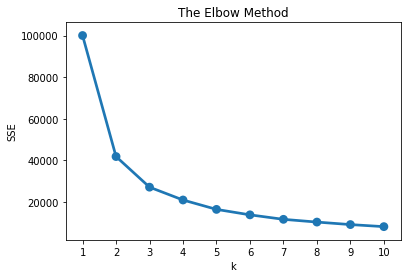

In [17]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title("The Elbow Method")
plt.xlabel("k")
plt.ylabel("SSE")
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [18]:
#Now we fit the model
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(50000,)

In [19]:
#interpretation
df2["Cluster"] = model.labels_
df2.groupby("Cluster").agg({
    "Frequency":"mean",
    "MonetaryValue":["mean", "count"]}).round(2)

Frequency MonetaryValue       
             mean          mean  count
Cluster                               
0            3.47        695.11  20456
1            1.11        298.39  18317
2            9.94       3042.55  11227

Next up we use a snake plot which needs a normalized dataset and the cluster labels. It is useful to see how the clusters differ from each other.

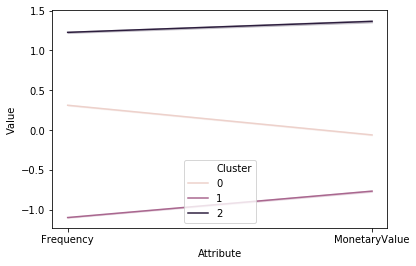

In [20]:
# Create the dataframe
df_normalized = pd.DataFrame(customers_normalized, columns=["Frequency", "MonetaryValue"])
df_normalized["ID"] = df2.index
df_normalized["Cluster"] = model.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=["ID", "Cluster"],
                      value_vars=["Frequency","MonetaryValue"],
                      var_name="Attribute",
                      value_name="Value")
df_nor_melt.head()
# Visualize it
sns.lineplot("Attribute", "Value", hue="Cluster", data=df_nor_melt)

### Insights & recommendations:

- Cluster 0 looks like the average spender. They are aware of their budget and spend money on what they think is appropriate. They rarely overspend but arent frugal either. This type of buyer does not buy out of impulse and needs facts and emotional messages to be influenced to buy.


- Cluster 1 is a classic frugalist. This type of buyer will rather save than buy and does not respond much to marketing messages. They are likely to avoid a purchase just out of the anticipated pain of spending money. On a marketing perspective it is important to show this kind of buyer that they are getting the best bang for their buck. Pricing and product description must be straightforward.


- Cluster 3 are our spendthrifts. They are easily convinced to make a purchase and enjoy shopping. The marketer should use a lot of visuals that trigger emotions and feelings to influence a spendthrift.

# Segmentation by Platform: Online/Offline/Hybrid

In [ ]:
#cluster them again

#### The online shoppers' average customer value


In [21]:
listt=["online shoppers'","offline shoppers'","hybrid shoppers'"]
dflist=[onlineusers,offlineusers,hybridusers]

for dfs,dfname in zip(dflist,listt):
    countusers=len(dfs)
    totalusers=len(df)
    percofusers=countusers/totalusers*100
    totalqty=dfs["ttl_qty"].sum()
    totaltxn=dfs["ttl_txn"].sum()
    totalto=dfs["ttl_to"].sum()
    percofto=round((dfs["ttl_to"].sum()/df["ttl_to"].sum())*100,0)

    avgto=dfs["ttl_to"].mean()
    avgtxn=dfs["ttl_txn"].mean()
    avgqty=dfs["ttl_qty"].mean()
    avgprice=avgto/avgqty
    
    print("The",dfname,"average customer value:")
    print("-",(f"{countusers:,d}"),"different customers (",(f"{int(round(percofusers,0)):,d}"),"% of total users) bought",(f"{totalqty:,d}"),"products in",(f"{totaltxn:,d}"),"transactions, totaling a turnover of",(f"{int(round(totalto,0)):,d}"),"Euro (",(f"{int(round(percofto,0)):,d}"),"% of total turnover).")
    print("-","On average, each user spends about",(f"{int(round(avgto,0)):,d}"),"Euro and buys",(f"{int(round(avgqty,0)):,d}"),"items via",(f"{int(round(avgtxn,0)):,d}"),"transactions (average item price",(f"{int(round(avgprice,0)):,d}"),"Euro).\n")
    

The online shoppers' average customer value:
- 4,540 different customers ( 9 % of total users) bought 22,099 products in 5,890 transactions, totaling a turnover of 3,267,498 Euro ( 6 % of total turnover).
- On average, each user spends about 720 Euro and buys 5 items via 1 transactions (average item price 148 Euro).

The offline shoppers' average customer value:
- 39,670 different customers ( 79 % of total users) bought 439,569 products in 150,928 transactions, totaling a turnover of 36,482,849 Euro ( 68 % of total turnover).
- On average, each user spends about 920 Euro and buys 11 items via 4 transactions (average item price 83 Euro).

The hybrid shoppers' average customer value:
- 5,790 different customers ( 12 % of total users) bought 144,855 products in 46,061 transactions, totaling a turnover of 14,092,999 Euro ( 26 % of total turnover).
- On average, each user spends about 2,434 Euro and buys 25 items via 8 transactions (average item price 97 Euro).



#### Insights & recommendations

- With 68% of total turnover, offline shoppers are still the most profitable user segment. This is mostly due to the sheer amount of offline buyers vs online buyers (79% vs 9% of total users). 

- On average, hybrid shoppers buy the most volume and most frequently. 

- The online shoppers do however outperform the two other segments when we look at the price ranges. The online shoppers actually go for higher priced items than any of the other buyer segments (which could be caused by effective online marketing or might just due to the fact that it is more convenient to buy big & bulky items, which are naturally more expensive, online).


It is interesting to see that there are still so many purely offline customers, it would definitely be good to convert more of them to hybrid buyers to have more touchpoints and opportunities for sales.


There are three hypotheses why online shoppers seem to buy higher priced items:

- It could be due to special promotions (holiday discounts etc only available to offline shoppers) or

- it could be because they buy differend kinds of sports categories online (e.g. big bulky items like stationary bike rather than small products like flip flops) or

- it could be gender ratio amongst online vs offline shoppers (skewing?)

### Sports Categories

In [22]:
onlineusers["platform"]="online"
offlineusers["platform"]="offline"
hybridusers["platform"]="hybrid"
dfall=(onlineusers.append(offlineusers).append(hybridusers)).reset_index(drop=True)
cols=dfall.columns
x=[col for col in cols if (col not in lsst)]
dfall=dfall[x]

typecat=["to_menx","to_womenx","to_kidx","to_gender_gapx"]
platcat=["to_onlinex","to_offlinex"]
daycat=["to_weekdayx","to_weekendx","to_holidayx"]
sportscat = [x for x in lssst if (x not in typecat) & (x not in platcat) & (x not in daycat)]
sportsdfcols=sportscat
ssss=dfall[sportsdfcols]
sportsdfcols.append("platform")

sportsdf=dfall[sportsdfcols]
n = sportsdf.groupby('platform')[sportscat].sum().reset_index()
n

,platform,to_althleticsx,to_badmintonx,to_baseballx,to_basketballx,to_beach_tennisx,to_beach_volleyballx,to_boat_sailingx,to_bodyboardingx,to_bodybuildingx,to_climbingx,to_cross_trainingx,to_dinghy_sailingx,to_dragon_boatx,to_fitnessx,to_footballx,to_freedivingx,to_golfx,to_gymnasticsx,to_hikingx,to_joggingx,to_kayakx,to_pilatesx,to_road_bikex,to_road_runningx,to_rugbyx,to_scuba_divingx,to_snorkellingx,to_squashx,to_supx,to_surfingx,to_swimmingx,to_table_tennisx,to_tennisx,to_trail_runningx,to_traithlonx,to_trekkingx,to_volleyballx,to_yogax
0,hybrid,150708.95,167580.24,5054.38,284772.85,2186.94,1316.62,134130.95,15449.63,521024.85,86037.00,173298.72,3882.17,255.97,481683.59,520003.16,49140.13,82716.67,159616.37,1518729.40,685434.94,165976.97,292319.51,213953.71,207182.07,28934.53,40907.13,224990.72,7653.10,76653.53,471768.41,732472.32,42287.15,512995.54,245659.82,137256.19,879603.48,5658.64,224082.88
1,offline,395282.97,536841.36,259.34,969929.03,5780.47,4857.39,275127.37,44740.77,685910.24,187252.90,415631.15,2619.63,2172.12,1386814.85,1092610.44,180189.73,157161.01,458907.01,4561777.61,2674197.86,379209.22,984716.05,488434.37,656084.94,62342.55,147294.59,741180.04,20536.83,57426.69,1595916.04,2494233.72,97510.36,1276224.77,713317.09,525705.63,2731452.57,10850.32,802421.47
2,online,22269.18,29870.40,5000.59,69821.42,8.02,1905.02,18028.15,4826.34,514298.32,7494.87,101117.26,935.98,0.00,264726.06,70037.39,3606.84,30189.24,35542.67,189098.59,77586.10,51531.90,99765.51,39135.23,31181.62,3002.07,6684.41,21251.60,1297.94,14796.74,32922.36,76123.26,7879.04,42269.07,17130.41,11848.36,137515.21,2227.51,74410.98


## Online

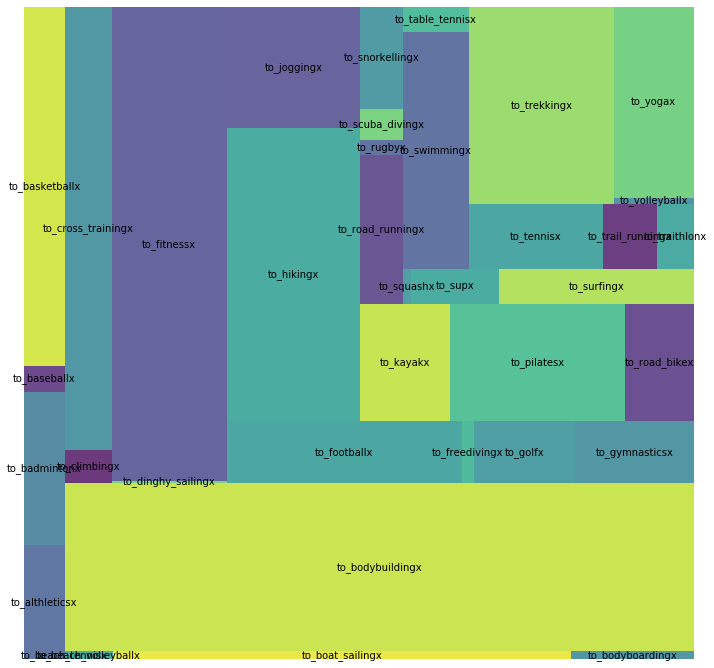

In [25]:
#we filter for platform, then drop platform column and then drop any columns with 0 values (otherwise we will get error in plotting)

#hy=n[n["platform"]=="online"].drop(["platform"],axis=1).drop(columns=ssss.columns[(ssss <= 0).any()])
hy=n[n["platform"]=="online"].drop(["platform"],axis=1)
hy= hy[hy.columns[(hy > 0).any()]]

vals=list(hy.values[0])
labels=hy.columns.to_list()

fig, ax = plt.subplots(1, figsize = (12,12))
squarify.plot(sizes=vals, 
              label=labels, 
              alpha=.8 )
plt.axis('off')
plt.show()

In [26]:
u=n[n["platform"]=="online"].drop(["platform"],axis=1).T
u.columns=["total turnover"]
u.sort_values(by="total turnover",ascending=False).head(5)

,total turnover
to_bodybuildingx,514298.32
to_fitnessx,264726.06
to_hikingx,189098.59
to_trekkingx,137515.21
to_cross_trainingx,101117.26


In [27]:
u.sort_values(by="total turnover",ascending=True).head(5)

,total turnover
to_dragon_boatx,0.00
to_beach_tennisx,8.02
to_dinghy_sailingx,935.98
to_squashx,1297.94
to_beach_volleyballx,1905.02


## Offline

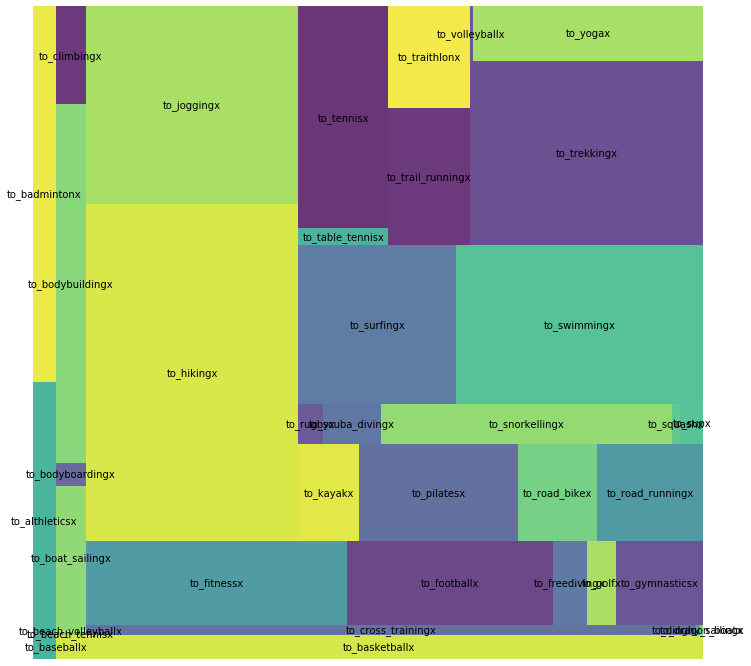

In [30]:

#hy=n[n["platform"]=="offline"].drop(["platform"],axis=1).drop(columns=ssss.columns[(ssss <= 0).any()])

hy=n[n["platform"]=="offline"].drop(["platform"],axis=1)
hy= hy[hy.columns[(hy > 0).any()]]

vals=list(hy.values[0])
vals=list(hy.values[0])
labels=hy.columns.to_list()

fig, ax = plt.subplots(1, figsize = (12,12))
squarify.plot(sizes=vals, 
              label=labels, 
              alpha=.8 )
plt.axis('off')
plt.show()

In [31]:
u=n[n["platform"]=="offline"].drop(["platform"],axis=1).T
u.columns=["total turnover"]
u.sort_values(by="total turnover",ascending=False).head(5)

,total turnover
to_hikingx,4561777.61
to_trekkingx,2731452.57
to_joggingx,2674197.86
to_swimmingx,2494233.72
to_surfingx,1595916.04


In [32]:
u.sort_values(by="total turnover",ascending=True).head(5)

,total turnover
to_baseballx,259.34
to_dragon_boatx,2172.12
to_dinghy_sailingx,2619.63
to_beach_volleyballx,4857.39
to_beach_tennisx,5780.47


### Category summary

- What we can see is that hiking and trekking are two categories that achieve high turnovers in both online and offline platforms. We could consider keeping higher stock levels, buying in bulk or negotiating auto-replenishment programs with our suppliers. 

- Body building, fitness and crosstraining are very strong categories in only online. The inventory in store should be kept small but it would be good to look at the stock levels in our distribution warehouses, our rates with third party logistics providers and cost for packaging material and see if we can optimize further. For these categories we could consider O2O marketing strategies to bring more digital customers into our physical stores.

- Jogging, swimming and surfing are bestsellers amongst offline shoppers. Since these customers visit the physical retail store it would be good to organize the shop floor in a way that these customers come by all other isles and hopefully pick up more things on the way. 

- The categories dragon boat, beach volleyball, beach tennis, dinghy sailing, baseball achieve lowest turnover on both platforms. We should make sure to keep stock to a minimum.